<a href="https://colab.research.google.com/github/vgls21/Data-Analysis-Portofolio/blob/main/Portofolio_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import βιβλιοθήκες

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Φόρτωση των απαραίτητων δεδομένων

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

Το dataset περιέχει 200 εγγραφές με 5 στήλες ανά εγγραφή

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Δεν υπάρχουν null τιμές στα δεδομένα

Προετοιμασία δεδομένων για το KMeans μοντέλο

In [ ]:
X = df.drop(columns=['CustomerID', 'Gender', 'Age'])

Εύρεση κατάλληλου αριθμού clusters για το KMeans μοντέλο

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

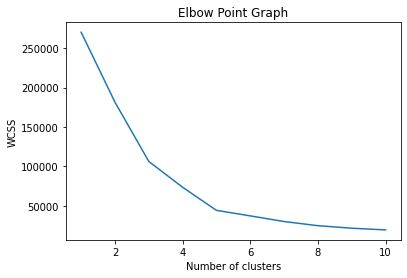

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Έχουμε τη μέγιστη δυνατή απόδοση, όταν ο αλγόριθμος τρέχει με 5 clusters

Δημιουργία KMeans μοντέλου

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

y = kmeans.fit_predict(X)

Οπτικοποίηση των αποτελεσμάτων

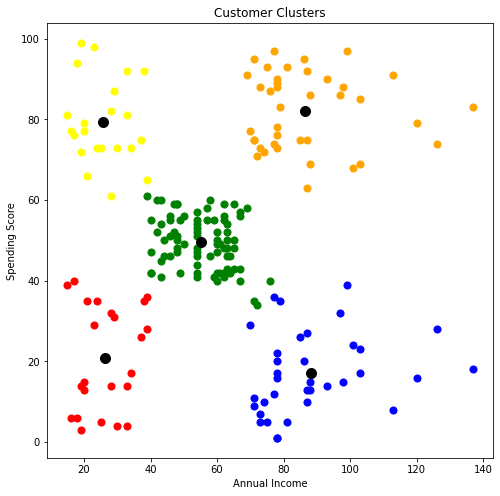

In [ ]:
X = np.array(X)

plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0] ,X[y==0,1], c='green', s=50, label='Cluster 1')
plt.scatter(X[y==1,0] ,X[y==1,1], c='blue', s=50, label='Cluster 2')
plt.scatter(X[y==2,0] ,X[y==2,1], c='red' ,s=50, label='Cluster 3')
plt.scatter(X[y==3,0] ,X[y==3,1], c='yellow' ,s=50, label='Cluster 4')
plt.scatter(X[y==4,0] ,X[y==4,1], c='orange' ,s=50, label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=100, label='Centroids')

plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Αυτό είναι το γράφημα με τα 5 διαφορετικά clusters-κατηγορίες πελατών